<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/BRITISH_AIRWAYS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib wordcloud textblob scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")




In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Basic exploration
print(df.head())
print(df.info())




  Verified                                            Reviews Recommended
0      yes       i was flying to warsaw for one day of mee...          no
1      yes       booked a ba holiday to marrakech, after p...         yes
2      yes      extremely sub-par service. highlights: no ...          no
3      yes       i virtually gave up on british airways ab...         yes
4      yes       i was pleasantly surprised that the airli...         yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Verified     3427 non-null   object
 1   Reviews      3427 non-null   object
 2   Recommended  3427 non-null   object
dtypes: object(3)
memory usage: 80.4+ KB
None


In [11]:
# Check a few rows of the dataset
print(df.head())




  Verified                                            Reviews Recommended
0      yes       i was flying to warsaw for one day of mee...          no
1      yes       booked a ba holiday to marrakech, after p...         yes
2      yes      extremely sub-par service. highlights: no ...          no
3      yes       i virtually gave up on british airways ab...         yes
4      yes       i was pleasantly surprised that the airli...         yes


In [13]:
# Check a few rows of the 'Reviews', 'Verified', and 'Recommended' columns
print(df[['Reviews', 'Verified', 'Recommended']].head())


                                             Reviews Verified Recommended
0       i was flying to warsaw for one day of mee...      yes          no
1       booked a ba holiday to marrakech, after p...      yes         yes
2      extremely sub-par service. highlights: no ...      yes          no
3       i virtually gave up on british airways ab...      yes         yes
4       i was pleasantly surprised that the airli...      yes         yes


In [15]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Data cleaning function
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove unnecessary whitespaces
    text = text.strip()
    return text

# Apply data cleaning to the 'Reviews' column
df['clean_reviews'] = df['Reviews'].apply(clean_text)


In [17]:
# Sentiment analysis
df['sentiment'] = df['clean_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [18]:
# Topic modeling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['clean_reviews'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(X)


  Verified                                            Reviews Recommended
0      yes       i was flying to warsaw for one day of mee...          no
1      yes       booked a ba holiday to marrakech, after p...         yes
2      yes      extremely sub-par service. highlights: no ...          no
3      yes       i virtually gave up on british airways ab...         yes
4      yes       i was pleasantly surprised that the airli...         yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Verified     3427 non-null   object
 1   Reviews      3427 non-null   object
 2   Recommended  3427 non-null   object
dtypes: object(3)
memory usage: 80.4+ KB
None


<ipython-input-20-5bd5807a410d>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_reviews'] = df['Reviews'].str.replace('[^\w\s]', '').str.lower()


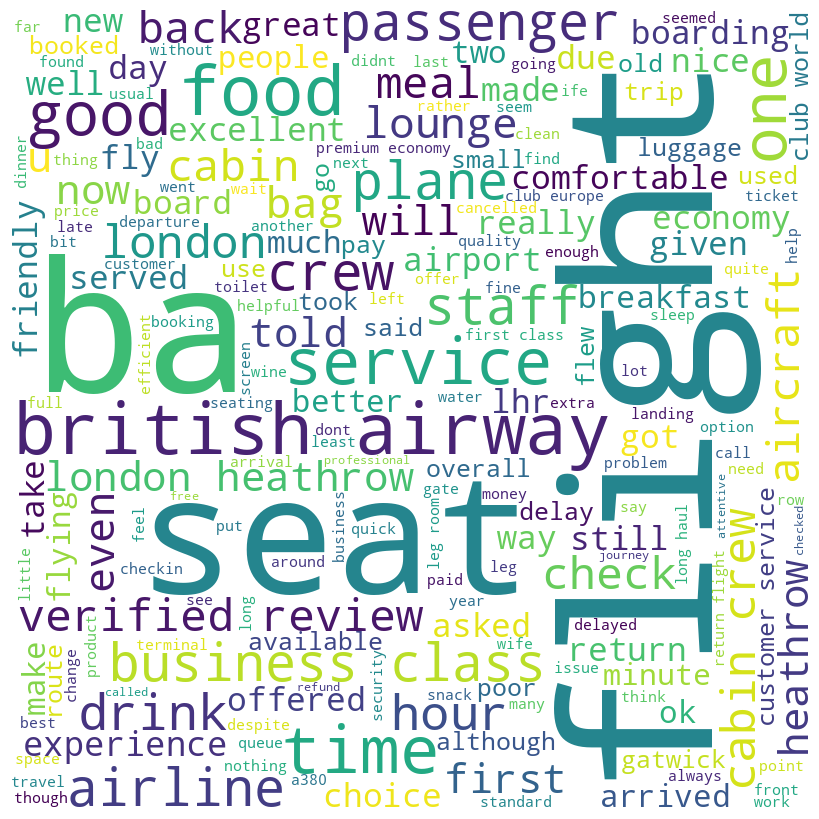

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Basic exploration
print(df.head())
print(df.info())

# Data cleaning
# Assuming 'text' column contains the reviews
# You may need to adjust this based on your actual dataset structure
# Example of basic text cleaning - remove special characters and convert to lowercase
df['clean_reviews'] = df['Reviews'].str.replace('[^\w\s]', '').str.lower()

# Sentiment analysis
df['sentiment'] = df['clean_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Topic modeling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['clean_reviews'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda_model.fit_transform(X)

# Word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),  # Use STOPWORDS here
                      min_font_size=10).generate(' '.join(df['clean_reviews']))

# Plotting word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


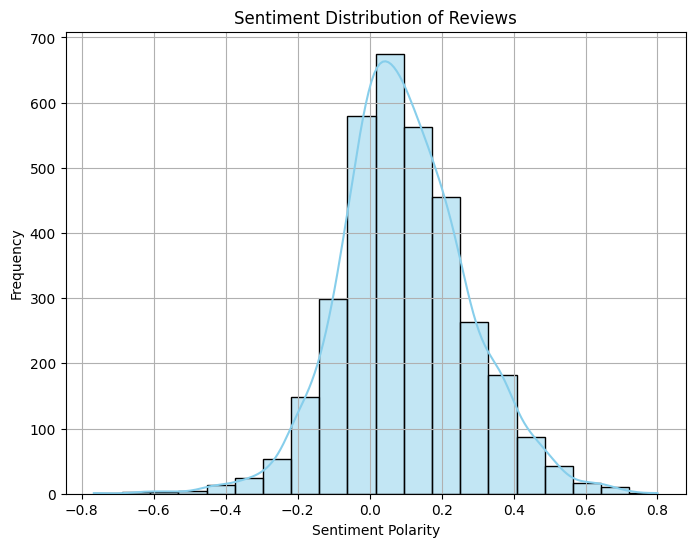

<ipython-input-21-f7ed65c6adbb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended', data=df, palette='viridis')


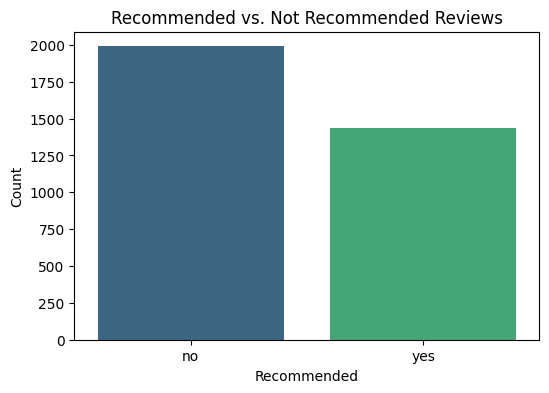

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize Recommended vs. Not Recommended reviews
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended', data=df, palette='viridis')
plt.title('Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()


In [24]:
df.info("/content/reviews_data1.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Verified     3427 non-null   object
 1   Reviews      3427 non-null   object
 2   Recommended  3427 non-null   object
dtypes: object(3)
memory usage: 80.4+ KB


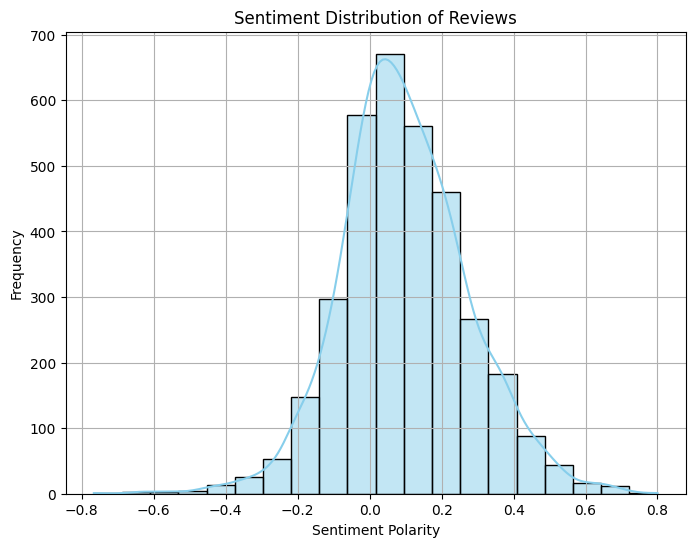

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Clean the 'Reviews' column if needed
# For sentiment analysis, assuming 'clean_reviews' column already exists after data cleaning

# Calculate sentiment polarity for each review
df['Recommended'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Recommended'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


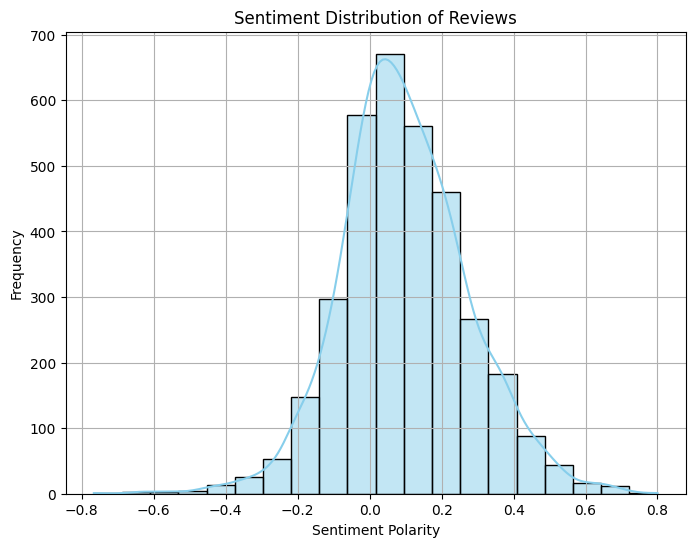

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Assuming 'clean_reviews' column already exists after data cleaning

# Calculate sentiment polarity for each review
df['Recommended'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Recommended'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-30-580c2dc89a52>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended', data=df, palette='viridis')


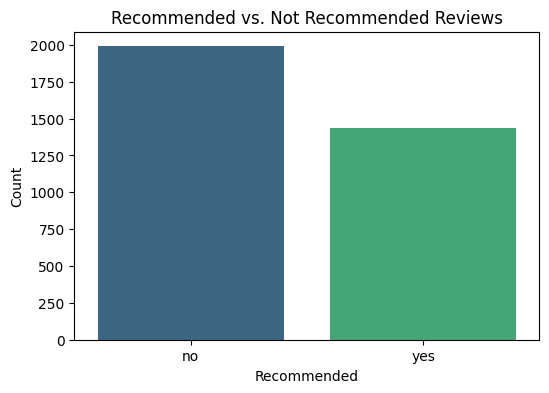

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Visualize Recommended vs. Not Recommended reviews
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended', data=df, palette='viridis')
plt.title('Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()


In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/reviews_data1.csv")

# Clean the 'Recommended' column (optional)
df['Recommended'] = df['Recommended'].str.strip()

# Count number of recommended vs. not recommended reviews
recommended_count = df[df['Recommended'].str.upper() == 'YES'].shape[0]
not_recommended_count = df[df['Recommended'].str.upper() == 'NO'].shape[0]

print("Number of Recommended Reviews:", recommended_count)
print("Number of Not Recommended Reviews:", not_recommended_count)



Number of Recommended Reviews: 1437
Number of Not Recommended Reviews: 1990
